In [132]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def process_xml_files(input_folder):
    # Initialize lists to store entity data
    entity_data = {'ID': [], 'ID entity': [], 'Offset': [], 'Text': [], 'Type': [], 'Full Sentence': []}

    # Initialize lists to store pair data
    pair_data = {'ID': [], 'ID pair': [], 'ID e1': [], 'ID e2': [],
                 'entity e1': [], 'entity e2': [], 'ddi': [], 'pair type': [], 'Full Sentence': []}

    # Iterate through each XML file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".xml"):
            file_path = os.path.join(input_folder, filename)

            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Iterate through each sentence in the XML
            for sentence in root.findall('.//sentence'):
                sentence_id = sentence.attrib['id']
                sentence_text = sentence.attrib['text']

                # Iterate through each entity in the sentence
                for entity in sentence.findall('.//entity'):
                    entity_id = entity.attrib['id']
                    offset = entity.attrib['charOffset']
                    text = entity.attrib['text']
                    entity_type = entity.attrib['type']

                    # Append entity data to lists
                    entity_data['ID'].append(sentence_id)
                    entity_data['ID entity'].append(entity_id)
                    entity_data['Offset'].append(offset)
                    entity_data['Text'].append(text)
                    entity_data['Type'].append(entity_type)
                    entity_data['Full Sentence'].append(str(sentence_text).rstrip()) 

                # Iterate through each pair in the sentence
                for pair in sentence.findall('.//pair'):
                    pair_id = pair.attrib['id']
                    e1_id = pair.attrib['e1']
                    e2_id = pair.attrib['e2']
                    ddi = pair.attrib['ddi']

                    # Determine the type based on the 'ddi' attribute
                    pair_type = "false" if ddi == 'false' else pair.attrib.get('type', None)

                    # Find the corresponding entities
                    e1_entity = entity_data['Text'][entity_data['ID entity'].index(e1_id)]
                    e2_entity = entity_data['Text'][entity_data['ID entity'].index(e2_id)]

                    # Append pair data to lists
                    pair_data['ID'].append(sentence_id)
                    pair_data['ID pair'].append(pair_id)
                    pair_data['ID e1'].append(e1_id)
                    pair_data['ID e2'].append(e2_id)
                    pair_data['entity e1'].append(e1_entity)
                    pair_data['entity e2'].append(e2_entity)
                    pair_data['ddi'].append(ddi)
                    pair_data['pair type'].append(pair_type)
                    pair_data['Full Sentence'].append(str(sentence_text).rstrip())

    # Create DataFrames from the data
    entity_df = pd.DataFrame(entity_data)
    pair_df = pd.DataFrame(pair_data)

    return entity_df, pair_df

# Input folder path
input_folder_path = '/Users/benphan/NCKU/Courses/BioMedical_Information_Retrieval/Homework5/SemEval-2013-task-9/data/Test-DDI'

# Process XML files in the input folder
entity_df, pair_df = process_xml_files(input_folder_path)


In [133]:
entity_df

,ID,ID entity,Offset,Text,Type,Full Sentence
0,DDI-MedLine.d180.s0,DDI-MedLine.d180.s0.e0,31-35,DZNep,drug_n,Determinants of sensitivity to DZNep induced a...
1,DDI-MedLine.d180.s1,DDI-MedLine.d180.s1.e0,4-22,3-Deazaneplanocin A,drug_n,"The 3-Deazaneplanocin A (DZNep), one of S-aden..."
2,DDI-MedLine.d180.s1,DDI-MedLine.d180.s1.e1,25-29,DZNep,drug_n,"The 3-Deazaneplanocin A (DZNep), one of S-aden..."
3,DDI-MedLine.d180.s3,DDI-MedLine.d180.s3.e0,24-28,DZNep,drug_n,RNA from un-treated and DZNep treated cells wa...
4,DDI-MedLine.d180.s6,DDI-MedLine.d180.s6.e0,119-123,DZNep,drug_n,Western-blot analysis indicated ALOX5 was high...
...,...,...,...,...,...,...
3035,DDI-MedLine.d189.s11,DDI-MedLine.d189.s11.e1,165-175,precocene I,drug_n,These results suggest that rat liver slices do...
3036,DDI-DrugBank.d605.s0,DDI-DrugBank.d605.s0.e0,0-7,SKELAXIN,brand,"SKELAXIN may enhance the effects of alcohol, b..."
3037,DDI-DrugBank.d605.s0,DDI-DrugBank.d605.s0.e1,36-42,alcohol,drug,"SKELAXIN may enhance the effects of alcohol, b..."
3038,DDI-DrugBank.d605.s0,DDI-DrugBank.d605.s0.e2,45-56,barbiturates,group,"SKELAXIN may enhance the effects of alcohol, b..."


In [134]:
entity_df.describe()

,ID,ID entity,Offset,Text,Type,Full Sentence
count,3040,3040,3040,3040,3040,3040
unique,1086,3040,1860,1055,4,1075
top,DDI-DrugBank.d680.s1,DDI-MedLine.d180.s0.e0,0-8,warfarin,drug,Based on studies evaluating possible interacti...
freq,25,1,37,54,1864,25


In [135]:
pair_df.head(20)

,ID,ID pair,ID e1,ID e2,entity e1,entity e2,ddi,pair type,Full Sentence
0,DDI-MedLine.d180.s1,DDI-MedLine.d180.s1.p0,DDI-MedLine.d180.s1.e0,DDI-MedLine.d180.s1.e1,3-Deazaneplanocin A,DZNep,false,false,"The 3-Deazaneplanocin A (DZNep), one of S-aden..."
1,DDI-MedLine.d180.s10,DDI-MedLine.d180.s10.p0,DDI-MedLine.d180.s10.e0,DDI-MedLine.d180.s10.e1,DZNep,DZNep,false,false,We also found that Bcl-2 was overexpressed in ...
2,DDI-MedLine.d180.s10,DDI-MedLine.d180.s10.p1,DDI-MedLine.d180.s10.e0,DDI-MedLine.d180.s10.e2,DZNep,ABT-737,false,false,We also found that Bcl-2 was overexpressed in ...
3,DDI-MedLine.d180.s10,DDI-MedLine.d180.s10.p2,DDI-MedLine.d180.s10.e0,DDI-MedLine.d180.s10.e3,DZNep,DZNep,false,false,We also found that Bcl-2 was overexpressed in ...
4,DDI-MedLine.d180.s10,DDI-MedLine.d180.s10.p3,DDI-MedLine.d180.s10.e1,DDI-MedLine.d180.s10.e2,DZNep,ABT-737,true,effect,We also found that Bcl-2 was overexpressed in ...
5,DDI-MedLine.d180.s10,DDI-MedLine.d180.s10.p4,DDI-MedLine.d180.s10.e1,DDI-MedLine.d180.s10.e3,DZNep,DZNep,false,false,We also found that Bcl-2 was overexpressed in ...
6,DDI-MedLine.d180.s10,DDI-MedLine.d180.s10.p5,DDI-MedLine.d180.s10.e2,DDI-MedLine.d180.s10.e3,ABT-737,DZNep,false,false,We also found that Bcl-2 was overexpressed in ...
7,DDI-MedLine.d180.s12,DDI-MedLine.d180.s12.p0,DDI-MedLine.d180.s12.e0,DDI-MedLine.d180.s12.e1,DZNep,ABT-737,false,false,"In addition, DZNep insensitivity might be asso..."
8,DDI-MedLine.d180.s12,DDI-MedLine.d180.s12.p1,DDI-MedLine.d180.s12.e0,DDI-MedLine.d180.s12.e2,DZNep,DZNep,false,false,"In addition, DZNep insensitivity might be asso..."
9,DDI-MedLine.d180.s12,DDI-MedLine.d180.s12.p2,DDI-MedLine.d180.s12.e1,DDI-MedLine.d180.s12.e2,ABT-737,DZNep,true,effect,"In addition, DZNep insensitivity might be asso..."


In [136]:
pair_df.describe()

,ID,ID pair,ID e1,ID e2,entity e1,entity e2,ddi,pair type,Full Sentence
count,5716,5716,5716,5716,5716,5716,5716,5716,5716
unique,790,5716,1954,1954,855,796,2,5,783
top,DDI-DrugBank.d680.s1,DDI-MedLine.d180.s1.p0,DDI-DrugBank.d680.s1.e0,DDI-DrugBank.d680.s1.e24,ketoconazole,warfarin,false,false,Based on studies evaluating possible interacti...
freq,300,1,24,24,90,100,4737,4737,300


In [137]:
pair_df["pair type"].value_counts()

false        4737
effect        360
mechanism     302
advise        221
int            96
Name: pair type, dtype: int64

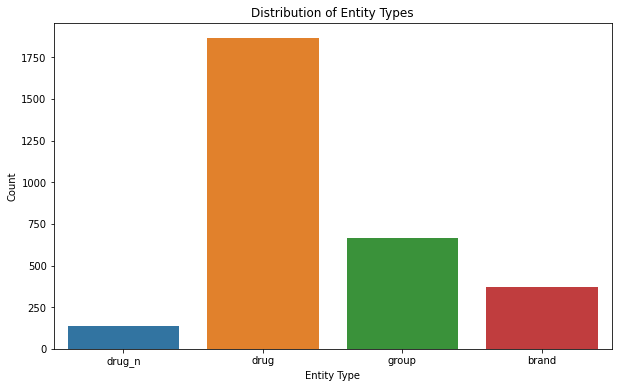

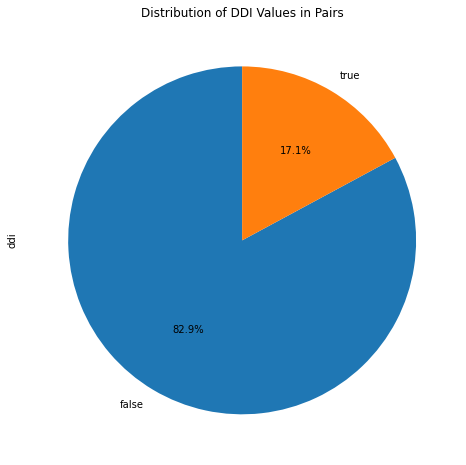

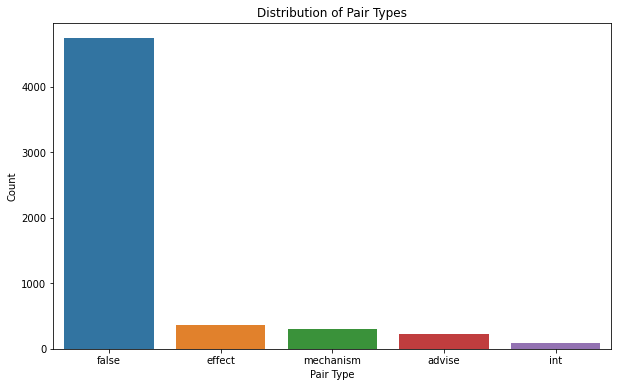

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have entity_df_result and pair_df_result DataFrames

# Plot a bar chart for the distribution of entity types in entity_df_result
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=entity_df)
plt.title('Distribution of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.show()

# Plot a pie chart for the distribution of ddi values in pair_df_result
plt.figure(figsize=(8, 8))
pair_df['ddi'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of DDI Values in Pairs')
plt.show()

# Plot a bar chart for the distribution of pair types in pair_df_result
plt.figure(figsize=(10, 6))
sns.countplot(x='pair type', data=pair_df)
plt.title('Distribution of Pair Types')
plt.xlabel('Pair Type')
plt.ylabel('Count')
plt.show()


In [139]:
data_frame = pair_df.loc[:, ['entity e1', 'entity e2', 'pair type',"Full Sentence"]]
new_rows = {'entity e1': data_frame['entity e2'],
            'entity e2': data_frame['entity e1'],
            'pair type': data_frame['pair type'],
            'Full Sentence': data_frame['Full Sentence']}
new_data_frame = data_frame.append(pd.DataFrame(new_rows), ignore_index=True)

In [140]:
new_data_frame.drop_duplicates(inplace=True)
new_data_frame

,entity e1,entity e2,pair type,Full Sentence
0,3-Deazaneplanocin A,DZNep,false,"The 3-Deazaneplanocin A (DZNep), one of S-aden..."
1,DZNep,DZNep,false,We also found that Bcl-2 was overexpressed in ...
2,DZNep,ABT-737,false,We also found that Bcl-2 was overexpressed in ...
4,DZNep,ABT-737,effect,We also found that Bcl-2 was overexpressed in ...
6,ABT-737,DZNep,false,We also found that Bcl-2 was overexpressed in ...
...,...,...,...,...
11427,barbiturates,SKELAXIN,effect,"SKELAXIN may enhance the effects of alcohol, b..."
11428,CNS depressants,SKELAXIN,effect,"SKELAXIN may enhance the effects of alcohol, b..."
11429,barbiturates,alcohol,false,"SKELAXIN may enhance the effects of alcohol, b..."
11430,CNS depressants,alcohol,false,"SKELAXIN may enhance the effects of alcohol, b..."


In [122]:
new_data_frame["pair type"].value_counts()

false        38646
effect        3004
mechanism     2201
advise        1398
int            370
Name: pair type, dtype: int64

In [125]:
new_data_frame.to_csv("save_results/train_dataset.csv", index=False,line_terminator='\n')

In [141]:
data_frame.to_csv("save_results/test_dataset.csv", index=False,line_terminator='\n')

In [126]:
dataset_frame_no_duplicates = new_data_frame[:50]

In [127]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your dataset
# Assuming your dataset is in a CSV file, change the filename accordingly
# filename = 'your_dataset.csv'
# dataset_frame_no_duplicates = pd.read_csv(filename)

# Preprocess the data
le = LabelEncoder()
dataset_frame_no_duplicates['pair type'] = le.fit_transform(dataset_frame_no_duplicates['pair type'])

# Split the data into training and validation sets
train_df, val_df = train_test_split(dataset_frame_no_duplicates, test_size=0.2, random_state=42)

# Define the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(le.classes_))

# Tokenize and encode the sentences
class MyDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sentence = self.data.iloc[index]['Full Sentence']
        e1 = self.data.iloc[index]['entity e1']
        e2 = self.data.iloc[index]['entity e2']
        pair_type = self.data.iloc[index]['pair type']

        #input_text = f"{sentence} [SEP] {e1} [SEP] {e2}"
        input_text = f"{sentence} [SEP] {e1} [SEP] {e2}"
        encoding = tokenizer(input_text, return_tensors='pt', truncation=True)

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(pair_type, dtype=torch.long)
        }

def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    labels = [item['labels'] for item in batch]

    # Pad sequences to the maximum length within the batch
    input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_mask = torch.nn.utils.rnn.pad_sequence(attention_mask, batch_first=True, padding_value=0)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': torch.stack(labels)
    }

train_dataset = MyDataset(train_df)
val_dataset = MyDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# Set up training parameters
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        print (loss)

    # Validation loop
    model.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {val_accuracy}')

# Save the trained model
model.save_pretrained('bert_model')


/Users/benphan/opt/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a Ber

tensor(1.4488, grad_fn=<NllLossBackward0>)
tensor(1.2490, grad_fn=<NllLossBackward0>)
tensor(0.9163, grad_fn=<NllLossBackward0>)
tensor(1.1286, grad_fn=<NllLossBackward0>)
tensor(0.7748, grad_fn=<NllLossBackward0>)
Epoch 1/10, Validation Accuracy: 0.5
tensor(0.8909, grad_fn=<NllLossBackward0>)
tensor(0.7897, grad_fn=<NllLossBackward0>)
tensor(0.8474, grad_fn=<NllLossBackward0>)
tensor(0.5284, grad_fn=<NllLossBackward0>)
tensor(0.9653, grad_fn=<NllLossBackward0>)
Epoch 2/10, Validation Accuracy: 0.5
tensor(0.4771, grad_fn=<NllLossBackward0>)
tensor(0.6571, grad_fn=<NllLossBackward0>)
tensor(0.6931, grad_fn=<NllLossBackward0>)
tensor(0.9015, grad_fn=<NllLossBackward0>)
tensor(0.6386, grad_fn=<NllLossBackward0>)
Epoch 3/10, Validation Accuracy: 0.5
tensor(0.4674, grad_fn=<NllLossBackward0>)
tensor(0.5213, grad_fn=<NllLossBackward0>)
tensor(0.5275, grad_fn=<NllLossBackward0>)
tensor(0.6370, grad_fn=<NllLossBackward0>)
tensor(0.8473, grad_fn=<NllLossBackward0>)
Epoch 4/10, Validation Accura

KeyboardInterrupt: 